<a href="https://colab.research.google.com/github/Marcosmpassos/WF-Lava-Jato/blob/main/WF_Lava_Jato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install warnings

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

In [ ]:
import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx as nx

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid")


In [ ]:
consumer_key= 'inserir key'
consumer_secret= 'inserir key'
access_token='inserir key'
access_token_secret= 'inserir key'

In [ ]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [ ]:
search_term = "lava+jato" + "-filter:retweets"

In [ ]:
tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="pt-br",).items(3000)

In [ ]:
all_tweets = [tweet.text for tweet in tweets]

In [ ]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [ ]:
tweets_no_urls

In [ ]:
# Create a sublist of lower case words for each tweet
words_in_tweet = [tweet.lower().split() for tweet in tweets_no_urls]

In [ ]:
words_in_tweet

In [ ]:
# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('portuguese'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

In [ ]:
tweets_nsw

In [ ]:
# Remove collection words
collection_words = ['Lava', 'Jato', 'lava', 'jato',
                    'acho', 'todas', 'pessoas', 'gente', 'varias', 
                    'vi', 'grande', 'mesma', 'igual', 'esto', 'at',
                    'vrias', 'j', 'coisa', 'maior', 'devolv', 'ano',
                    'diz', 'sobre', 'h']



In [ ]:
tweets_nsw_nc = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw]

In [ ]:
tweets_nsw_nc

In [ ]:
# Process for word counts
all_words_nsw = list(itertools.chain(*tweets_nsw_nc))

counts_nsw = collections.Counter(all_words_nsw)

clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),
                             columns=['words', 'count'])
clean_tweets_nsw

,words,count
0,moro,13
1,lavajato,11
2,dinheiro,10
3,stf,10
4,gilmar,9
5,lula,9
6,q,8
7,fachin,8
8,alm,8
9,devolver,8


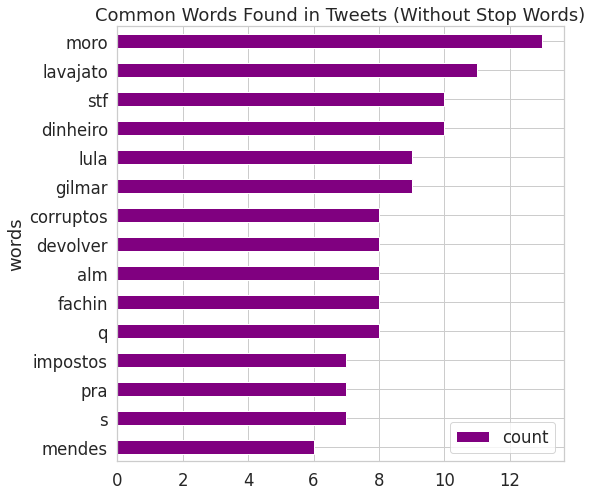

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop Words)")

plt.show()

In [ ]:
from nltk import bigrams

In [ ]:
# Create list of lists containing bigrams in tweets
terms_bigram = [list(bigrams(tweet)) for tweet in tweets_nsw_nc]

In [ ]:
# View bigrams for the first tweet
terms_bigram[0]

[('julgamento', 'moro'),
 ('moro', 'gilmar'),
 ('gilmar', 'cita'),
 ('cita', 'advogado'),
 ('advogado', 'misterioso'),
 ('misterioso', 'informao'),
 ('informao', 'contra')]

In [ ]:
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

In [ ]:
# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

In [ ]:
bigram_counts.most_common(32)

[(('alm', 'impostos'), 7),
 (('impostos', 'devolver'), 7),
 (('devolver', 'dinheiro'), 7),
 (('gilmar', 'mendes'), 6),
 (('dinheiro', 'corruptos'), 6),
 (('edson', 'fachin'), 5),
 (('stfoficial', 'ministro'), 4),
 (('ministro', 'stf'), 4),
 (('stf', 'edson'), 4),
 (('fachin', 'canalha'), 4),
 (('canalha', 'anula'), 4),
 (('anula', 'condenaes'), 4),
 (('condenaes', 'ladro'), 4),
 (('postando', 'fake'), 4),
 (('fake', 'newsparecem'), 4),
 (('newsparecem', 'robs'), 4),
 (('robs', 'espalhando'), 4),
 (('espalhando', 'mentiras'), 4),
 (('srgio', 'moro'), 3),
 (('rede', 'globo'), 3),
 (('berieux', 'postando'), 3),
 (('suspeio', 'srgio'), 2),
 (('bilhes', 'reais'), 2),
 (('bilhes', 'recuperados'), 2),
 (('contra', 'moro'), 2),
 (('bilhes', 'recuperou'), 2),
 (('tucomay', 'peterjordan100'), 2),
 (('orquestrao', 'desqualificar'), 2),
 (('desqualificar', 'moro'), 2),
 (('moro', 'marco'), 2),
 (('marco', 'aurlio'), 2),
 (('aurlio', 'lavajato'), 2)]

In [ ]:
bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])

bigram_df

,bigram,count
0,"(alm, impostos)",7
1,"(impostos, devolver)",7
2,"(devolver, dinheiro)",7
3,"(gilmar, mendes)",6
4,"(dinheiro, corruptos)",6
5,"(edson, fachin)",5
6,"(stfoficial, ministro)",4
7,"(ministro, stf)",4
8,"(stf, edson)",4
9,"(fachin, canalha)",4


In [ ]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')

In [ ]:
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

G.add_node("china", weight=100)

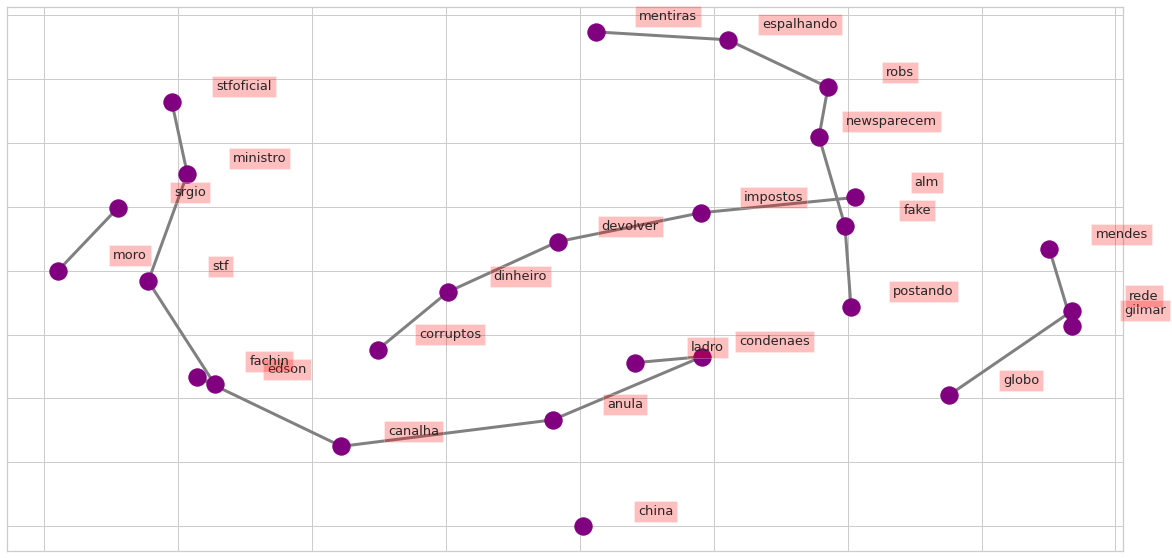

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

In [ ]:
# Process for word counts
all_words_nsw = list(itertools.chain(*tweets_nsw_nc))
 
counts_nsw = collections.Counter(all_words_nsw)
 
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),
                             columns=['words', 'count'])
clean_tweets_nsw